### Boxplots for p-vals
For each cluster, we take an average over all slices.  

### Inhibitory clusters

In [1]:
df<- list()
for (i in 1:5){
    outfilename <- paste0('./temp/table-in',i,".csv")
    df[[i]] = read.csv(outfilename)
}
types<- df[[1]]$Cluster

In [2]:
df1 = read.csv("./temp/table-in.csv")

In [3]:
data1<-df1[1:10,c(1,7)]

We calculate a list of pvals for each cluster over all slices.

In [4]:
X<-list()
for (t in 1:10){
    temp <- c()
    for (i in 1:5){
        temp<-c(temp, na.omit(unname(unlist(df[[i]][t,2:6]))))
    }
    X[[types[t]]] = temp
}

In [5]:
X

$`0624 Vip Gaba_1`
[1] 0.010 0.010 0.010 0.015 0.010

$`0641 Vip Gaba_5`
[1] 0.010 0.010 0.025 0.010 0.010

$`0645 Vip Gaba_6`
 [1] 0.015 0.080 0.010 0.070 0.075 0.020 0.010 0.165 0.015 0.090

$`0709 Lamp5 Gaba_1`
[1] 0.035 0.010 0.050 0.020 0.030

$`0740 Pvalb Gaba_3`
 [1] 0.030 0.020 0.835 0.015 0.010 0.045 0.845 0.015 0.025 0.045 0.835 0.035
[13] 0.040 0.035 0.840 0.010 0.025 0.050 0.850 0.010

$`0741 Pvalb Gaba_3`
[1] 0.010 0.005 0.005 0.005 0.010

$`0742 Pvalb Gaba_3`
 [1] 0.095 0.070 0.010 0.030 0.050 0.025 0.055 0.035 0.105 0.040

$`0747 Pvalb Gaba_4`
[1] 0.015 0.025 0.015 0.015 0.015

$`0754 Pvalb Gaba_8`
 [1] 0.010 0.040 0.010 0.025 0.005 0.025 0.010 0.010 0.005 0.040

$`0811 Sst Gaba_13`
[1] 0.020 0.015 0.015 0.025 0.015

In [6]:
data<- data.frame(cluster = rep(names(X), sapply(X, length)), pv=unname(do.call('c', X)))
row.names(data) <- NULL

In [7]:
row.names(data1) <- NULL

In [8]:
library('ggplot2')
options(repr.plot.width=40, repr.plot.height=15)

In [9]:
unique(as.factor(data$cluster))

[1] 0624 Vip Gaba_1   0641 Vip Gaba_5   0645 Vip Gaba_6   0709 Lamp5 Gaba_1
 [5] 0740 Pvalb Gaba_3 0741 Pvalb Gaba_3 0742 Pvalb Gaba_3 0747 Pvalb Gaba_4
 [9] 0754 Pvalb Gaba_8 0811 Sst Gaba_13 
10 Levels: 0624 Vip Gaba_1 0641 Vip Gaba_5 ... 0811 Sst Gaba_13

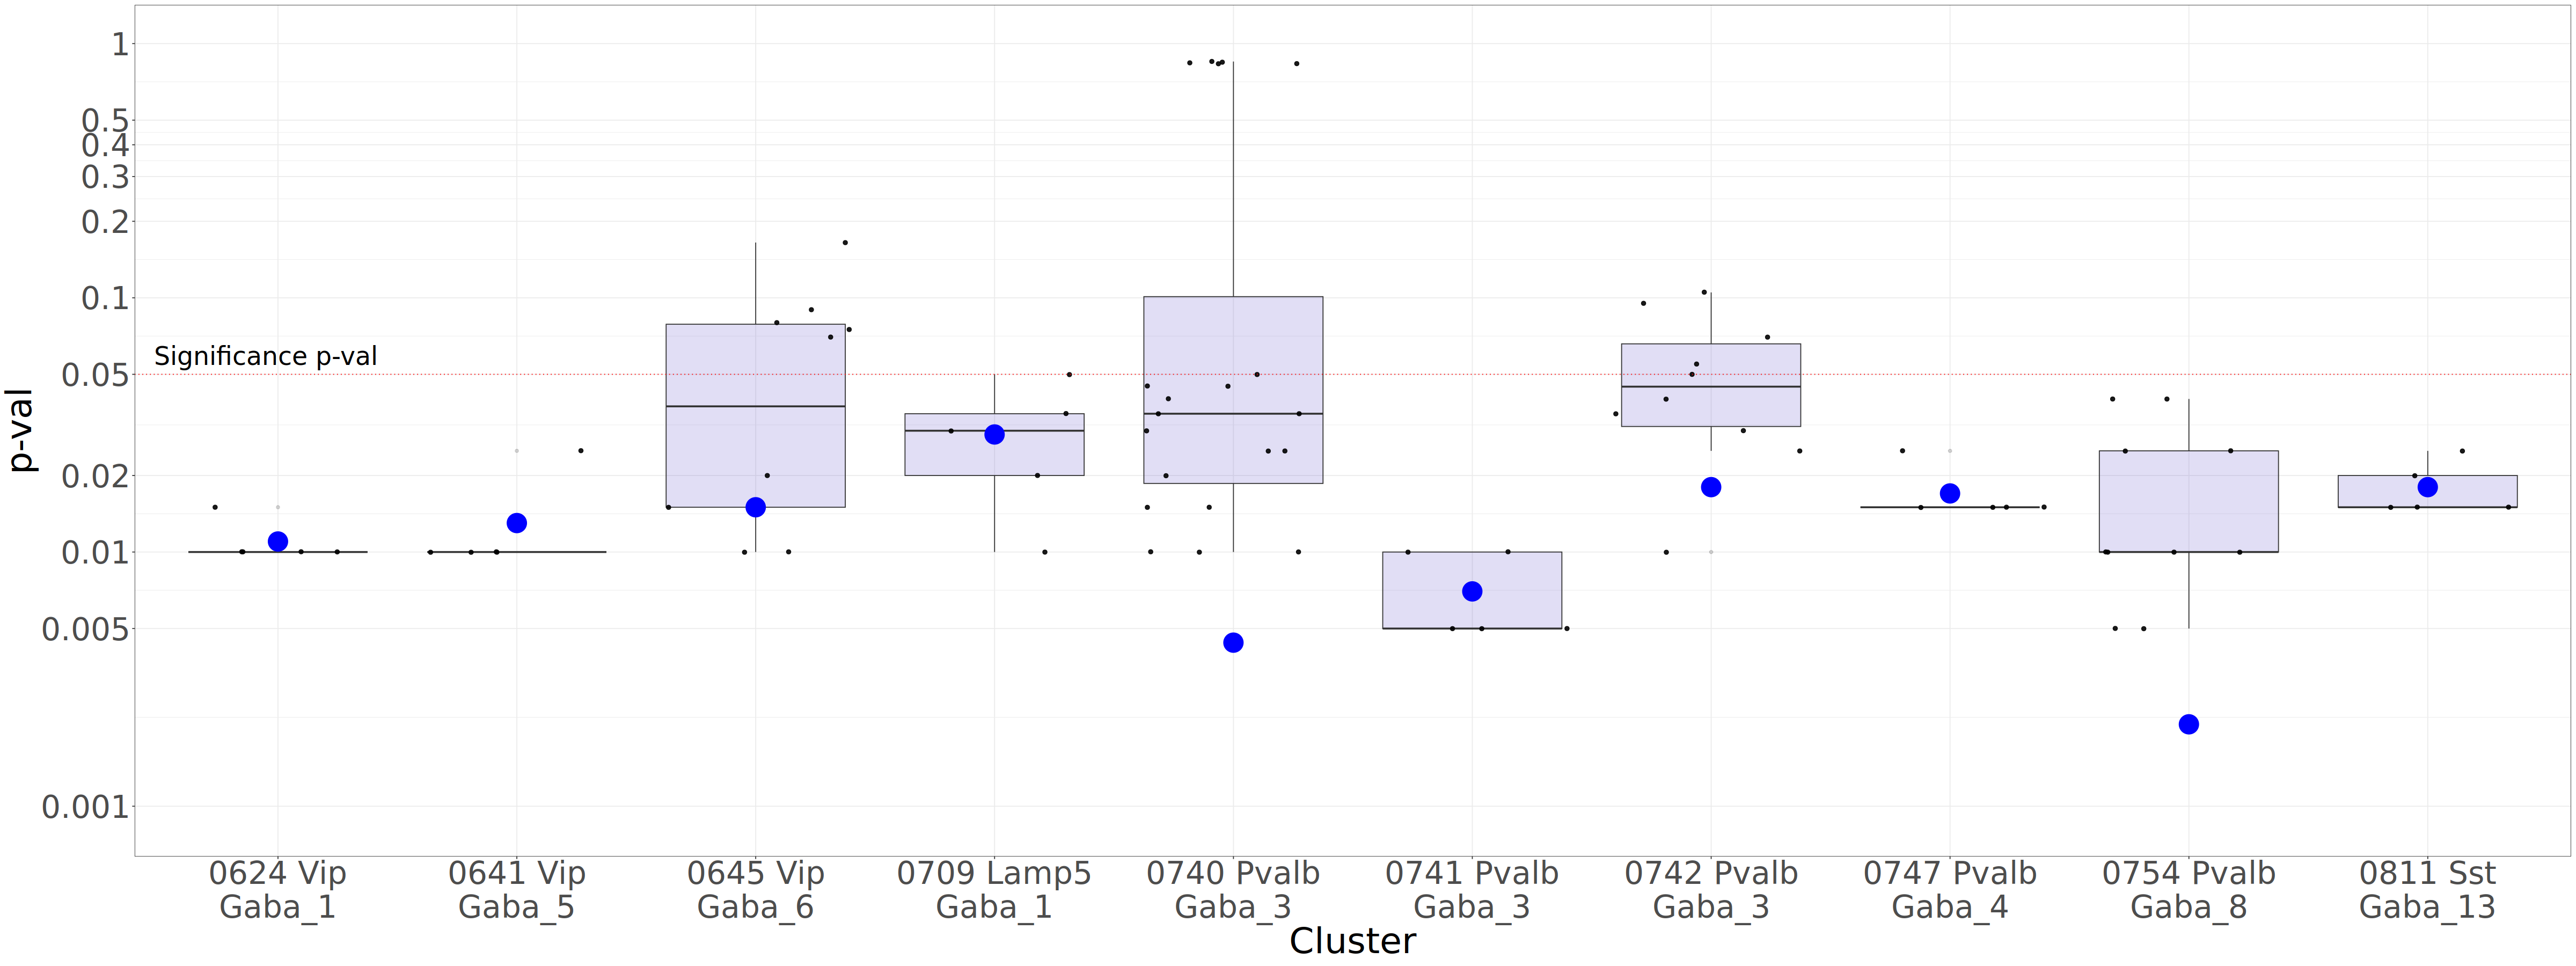

In [ ]:
breaks = c(0.001, 0.005, 0.01,0.02, 0.05,0.1,0.2,0.3,0.4,0.5,1)
ggplot(data, aes(x=as.factor(cluster), y=pv)) + scale_y_log10(breaks = breaks, labels = breaks, limit = c(0.0009,1))+ 
    scale_x_discrete(breaks=unique(data$cluster),labels=function(x){sub("\\sG",'\nG',x)})+
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    geom_jitter(color="black", size=2, alpha=0.9) + 
    theme_bw()+
    xlab("Cluster") + ylab('p-val')+theme(axis.text=element_text(size=35),
        axis.title=element_text(size=40))+geom_hline(yintercept=0.05, linetype='dotted', col = 'red')+
  annotate("text", x = 0.95, y = 0.05, label = "Significance p-val", vjust = -0.5,size=10)+
    geom_point(data = data1, aes(x = as.factor(Cluster), y = pval),color = "blue",size = 10)